In [0]:
from google.colab import drive

In [2]:
# Mounting the drive where the dataset is present
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Getting the dataset from the drive
import h5py
filepath = '/content/drive/My Drive/Deep Learning/SVHN_single_grey1.h5'
h5f = h5py.File(filepath, 'r')

In [0]:
#Load the training and test set

X_train_original = h5f['X_train'][:]
y_train_original = h5f['y_train'][:]
X_test_original  = h5f['X_test'][:]
y_test_original  = h5f['y_test'][:]
X_val_original   =h5f['X_val'][:]
y_val_original   =h5f['y_val'][:]

In [5]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
import numpy as np
from sklearn import metrics

Using TensorFlow backend.


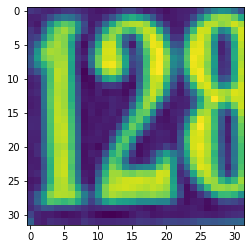

Label:  2


In [6]:
plt.imshow(X_train_original[0])    # show first element in the dataset
plt.show()
print('Label: ', y_train_original[0])

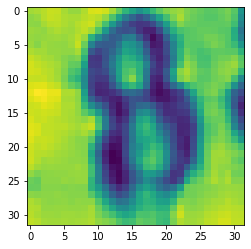

Label:  8


In [7]:
plt.imshow(X_test_original[10])    # show first number in the dataset
plt.show()
print('Label: ', y_test_original[10])

### Data Pre-processing

In [8]:
print(X_train_original.shape, X_test_original.shape, y_train_original.shape, y_test_original.shape,X_val_original.shape,y_val_original.shape)

(42000, 32, 32) (18000, 32, 32) (42000,) (18000,) (60000, 32, 32) (60000,)


In [9]:
# reshaping X data: (n, 32, 32) => (n, 1024)
X_train = X_train_original.reshape((X_train_original.shape[0], -1))
X_test = X_test_original.reshape((X_test_original.shape[0], -1))

print(X_train.shape, X_test.shape)

(42000, 1024) (18000, 1024)


In [0]:
# normalising inputs from 0-255 to 0-1
X_train = X_train/255.0
X_test = X_test/255.0

In [0]:
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train_original)
y_test = to_categorical(y_test_original)

In [12]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(42000, 1024) (18000, 1024) (42000, 10) (18000, 10)


### Basic NN model

Naive MLP model without any alterations

In [0]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers

In [14]:
model = Sequential()

In [15]:
model.add(Dense(50, input_shape = (1024, )))
model.add(Activation('sigmoid'))

model.add(Dense(50))
model.add(Activation('sigmoid'))

model.add(Dense(50))
model.add(Activation('sigmoid'))

model.add(Dense(50))
model.add(Activation('sigmoid'))

model.add(Dense(10))
model.add(Activation('softmax'))

In [16]:
sgd = optimizers.SGD(lr = 0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [17]:
history = model.fit(X_train, y_train, batch_size = 200, epochs = 100, verbose = 1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





42000/42000 [==============================] - 2s 47us/step - loss: 2.3617 - acc: 0.1003
Epoch 2/100
42000/42000 [==============================] - 1s 18us/step - loss: 2.3029 - acc: 0.0960
Epoch 3/100
42000/42000 [==============================] - 1s 16us/step - loss: 2.3029 - acc: 0.0970
Epoch 4/100
42000/42000 [==============================] - 1s 17us/step - loss: 2.3028 - acc: 0.0986
Epoch 5/100
42000/42000 [==============================] - 1s 17us/step - loss: 2.3028 - acc: 0.0989
Epoch 6/100
42000/42000 [==============================] - 1s 17us/step - loss: 2.3028 - acc: 0.0992
Epoch 7/100
42000/42000 [==============================] - 1s 17us/step - loss: 2.3029 - acc: 0.0988
Epoch 8/100
42000/42000 [==============================] - 1s 17us/step - loss: 2.3028 - acc: 0.0988
Epoch 9/100
42000/42000 [==============================] - 1s 17us/step - loss: 2.3028 - a

In [18]:
results = model.evaluate(X_test, y_test)

18000/18000 [==============================] - 1s 37us/step


In [19]:
print('Test accuracy: ', results[1])

Test accuracy:  0.10038888888888889


In [20]:
ypred = model.predict(X_test)
classes = np.argmax(ypred, axis=1)
# calculate accuracy
print("Accuracy of the model is : ",metrics.accuracy_score(y_test_original, classes))
# examine the class distribution of the testing set
print("----------Confusion Matrix----------")
cm = metrics.confusion_matrix(y_test_original, classes)
print(cm)
print("--------Recall and Precision for multiclass--------")
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)
print("Recall : ",recall)
print("Precision : ",precision)

Accuracy of the model is :  0.10038888888888889
----------Confusion Matrix----------
[[   0    0 1770    0    0   44    0    0    0    0]
 [   0    0 1798    0    0   30    0    0    0    0]
 [   0    0 1766    0    0   37    0    0    0    0]
 [   0    0 1694    0    0   25    0    0    0    0]
 [   0    0 1790    0    0   22    0    0    0    0]
 [   0    0 1727    0    0   41    0    0    0    0]
 [   0    0 1783    0    0   49    0    0    0    0]
 [   0    0 1758    0    0   50    0    0    0    0]
 [   0    0 1772    0    0   40    0    0    0    0]
 [   0    0 1765    0    0   39    0    0    0    0]]
--------Recall and Precision for multiclass--------
Recall :  [0.         0.         0.97947865 0.         0.         0.02319005
 0.         0.         0.         0.        ]
Precision :  [       nan        nan 0.10020995        nan        nan 0.10875332
        nan        nan        nan        nan]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


### Weight Initialization

# Changing weight initialization scheme can significantly improve training of the model by preventing vanishing gradient problem up to some degree

In [0]:
# from now on, create a function to generate (return) models
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (1024, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.01)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [22]:
model = mlp_model()
history = model.fit(X_train, y_train, batch_size=200, epochs = 100, verbose = 1)


Epoch 1/100
42000/42000 [==============================] - 1s 21us/step - loss: 2.3381 - acc: 0.0992
Epoch 2/100
42000/42000 [==============================] - 1s 17us/step - loss: 2.3029 - acc: 0.0995
Epoch 3/100
42000/42000 [==============================] - 1s 17us/step - loss: 2.3028 - acc: 0.0982
Epoch 4/100
42000/42000 [==============================] - 1s 18us/step - loss: 2.3027 - acc: 0.1005
Epoch 5/100
42000/42000 [==============================] - 1s 17us/step - loss: 2.3028 - acc: 0.0961
Epoch 6/100
42000/42000 [==============================] - 1s 17us/step - loss: 2.3028 - acc: 0.0977
Epoch 7/100
42000/42000 [==============================] - 1s 17us/step - loss: 2.3028 - acc: 0.0996
Epoch 8/100
42000/42000 [==============================] - 1s 17us/step - loss: 2.3028 - acc: 0.0990
Epoch 9/100
42000/42000 [==============================] - 1s 17us/step - loss: 2.3028 - acc: 0.1000
Epoch 10/100
42000/42000 [==============================] - 1s 17us/step - loss: 2.3028 - 

In [23]:
results = model.evaluate(X_test, y_test)

18000/18000 [==============================] - 1s 38us/step


In [24]:
print('Test accuracy: ', results[1])

Test accuracy:  0.09994444444444445


In [25]:
ypred = model.predict(X_test)
classes = np.argmax(ypred, axis=1)
# calculate accuracy
print("Accuracy of the model is : ",metrics.accuracy_score(y_test_original, classes))
# examine the class distribution of the testing set
print("----------Confusion Matrix----------")
cm = metrics.confusion_matrix(y_test_original, classes)
print(cm)
print("--------Recall and Precision for multiclass--------")
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)
print("Recall : ",recall)
print("Precision : ",precision)

Accuracy of the model is :  0.09994444444444445
----------Confusion Matrix----------
[[   0    0    0    0    0  828    0    0    0  986]
 [  16    0    0    0    0  832    0    0    0  980]
 [  10    0    0    0    2  739    0    0    0 1052]
 [   2    0    0    0    0  834    0    0    0  883]
 [   1    0    0    0    0  765    0    0    0 1046]
 [   0    0    0    0    1  817    0    0    0  950]
 [   0    0    0    0    0  822    0    0    0 1010]
 [  21    0    0    0    2  810    0    0    0  975]
 [   1    0    0    0    1  796    0    0    0 1014]
 [   3    0    0    0    1  818    0    0    0  982]]
--------Recall and Precision for multiclass--------
Recall :  [0.         0.         0.         0.         0.         0.46210407
 0.         0.         0.         0.5443459 ]
Precision :  [0.                nan        nan        nan 0.         0.10135219
        nan        nan        nan 0.09941284]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


### Nonlinearity (Activation function)

Sigmoid functions suffer from gradient vanishing problem, making training slower

There are many choices apart from sigmoid and tanh; try many of them!

'relu' (rectified linear unit) is one of the most popular ones


In [0]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (1024, )))
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(Activation('relu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.01)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [27]:
model = mlp_model()
history = model.fit(X_train, y_train, batch_size=200, epochs = 100, verbose = 1)

Epoch 1/100
42000/42000 [==============================] - 1s 22us/step - loss: 2.3045 - acc: 0.1098
Epoch 2/100
42000/42000 [==============================] - 1s 16us/step - loss: 2.2998 - acc: 0.1164
Epoch 3/100
42000/42000 [==============================] - 1s 17us/step - loss: 2.2976 - acc: 0.1285
Epoch 4/100
42000/42000 [==============================] - 1s 18us/step - loss: 2.2948 - acc: 0.1432
Epoch 5/100
42000/42000 [==============================] - 1s 17us/step - loss: 2.2903 - acc: 0.1617
Epoch 6/100
42000/42000 [==============================] - 1s 17us/step - loss: 2.2841 - acc: 0.1739
Epoch 7/100
42000/42000 [==============================] - 1s 19us/step - loss: 2.2754 - acc: 0.1862
Epoch 8/100
42000/42000 [==============================] - 1s 17us/step - loss: 2.2627 - acc: 0.2009
Epoch 9/100
42000/42000 [==============================] - 1s 17us/step - loss: 2.2446 - acc: 0.2173
Epoch 10/100
42000/42000 [==============================] - 1s 17us/step - loss: 2.2178 - a

In [28]:
results = model.evaluate(X_test, y_test)

18000/18000 [==============================] - 1s 41us/step


In [29]:
print('Test accuracy: ', results[1])

Test accuracy:  0.7476666666666667


In [30]:
ypred = model.predict(X_test)
classes = np.argmax(ypred, axis=1)
# calculate accuracy
print("Accuracy of the model is : ",metrics.accuracy_score(y_test_original, classes))
# examine the class distribution of the testing set
print("----------Confusion Matrix----------")
cm = metrics.confusion_matrix(y_test_original, classes)
print(cm)
print("--------Recall and Precision for multiclass--------")
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)
print("Recall : ",recall)
print("Precision : ",precision)

Accuracy of the model is :  0.7476666666666667
----------Confusion Matrix----------
[[1405   43   20   41   48   25   74   33   64   61]
 [  31 1511   29   61   68   17   14   46   29   22]
 [  10   55 1386   63   31   28    9  148   36   37]
 [  16  113   54 1212   13  159   16   77   40   19]
 [  35   95   42   29 1443   28   52   14   46   28]
 [  25   63   21  171   38 1253   51   38   73   35]
 [  70   48   23   32  104   85 1310    9  134   17]
 [  18   84  109   48    8   24   12 1453   26   26]
 [  48   74   40   71   58   81  101   23 1248   68]
 [  88   87   56   89   38   74   11   43   81 1237]]
--------Recall and Precision for multiclass--------
Recall :  [0.77453142 0.82658643 0.7687188  0.70506108 0.79635762 0.70871041
 0.7150655  0.80365044 0.68874172 0.68569845]
Precision :  [0.80469645 0.69535205 0.77865169 0.66703357 0.78042185 0.70631342
 0.79393939 0.77123142 0.70230726 0.79806452]


### Nonlinearity (Activation function) And Weight Initialization

In [0]:
# from now on, create a function to generate (return) models
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (1024, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.01)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [32]:
model = mlp_model()
history = model.fit(X_train, y_train, batch_size=200, epochs = 100, verbose = 1)

Epoch 1/100
42000/42000 [==============================] - 1s 23us/step - loss: 2.3004 - acc: 0.1179
Epoch 2/100
42000/42000 [==============================] - 1s 17us/step - loss: 2.2792 - acc: 0.1483
Epoch 3/100
42000/42000 [==============================] - 1s 17us/step - loss: 2.2525 - acc: 0.1813
Epoch 4/100
42000/42000 [==============================] - 1s 17us/step - loss: 2.2054 - acc: 0.2304
Epoch 5/100
42000/42000 [==============================] - 1s 19us/step - loss: 2.1191 - acc: 0.2850
Epoch 6/100
42000/42000 [==============================] - 1s 17us/step - loss: 1.9998 - acc: 0.3263
Epoch 7/100
42000/42000 [==============================] - 1s 17us/step - loss: 1.8853 - acc: 0.3655
Epoch 8/100
42000/42000 [==============================] - 1s 17us/step - loss: 1.7865 - acc: 0.4059
Epoch 9/100
42000/42000 [==============================] - 1s 17us/step - loss: 1.6904 - acc: 0.4481
Epoch 10/100
42000/42000 [==============================] - 1s 17us/step - loss: 1.5968 - a

In [33]:
results = model.evaluate(X_test, y_test)

18000/18000 [==============================] - 1s 43us/step


In [34]:
print('Test accuracy: ', results[1])

Test accuracy:  0.7675555555555555


In [35]:
ypred = model.predict(X_test)
classes = np.argmax(ypred, axis=1)
# calculate accuracy
print("Accuracy of the model is : ",metrics.accuracy_score(y_test_original, classes))
# examine the class distribution of the testing set
print("----------Confusion Matrix----------")
cm = metrics.confusion_matrix(y_test_original, classes)
print(cm)
print("--------Recall and Precision for multiclass--------")
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)
print("Recall : ",recall)
print("Precision : ",precision)

Accuracy of the model is :  0.7675555555555555
----------Confusion Matrix----------
[[1374  114   33   33   51   11   46   68   26   58]
 [  18 1602   30   27   38   10   11   65   16   11]
 [   9   73 1424   42   30   12   14  151   21   27]
 [  17   91   59 1298   14  107    9   62   37   25]
 [  37  136   35   27 1467   14   25   24   18   29]
 [  19   64   23  160   26 1299   46   28   60   43]
 [  45   69   24   32   81   95 1340   20  112   14]
 [  16  108   64   19    8    8    9 1546    9   21]
 [  34   91   67   84   46   95   73   20 1239   63]
 [  70  114   59   74   49   51   15   64   81 1227]]
--------Recall and Precision for multiclass--------
Recall :  [0.75744212 0.87636761 0.78979479 0.75509017 0.80960265 0.73472851
 0.73144105 0.8550885  0.68377483 0.68015521]
Precision :  [0.83831605 0.6506905  0.78327833 0.72271715 0.81049724 0.76321974
 0.84382872 0.75488281 0.76528721 0.8083004 ]


### Batch Normalization

Batch Normalization, one of the methods to prevent the "internal covariance shift" problem, has proven to be highly effective

Normalize each mini-batch before nonlinearity

In [0]:
from keras.layers import BatchNormalization, Dropout

Batch normalization layer is usually inserted after dense/convolution and before nonlinearity



In [0]:
def bn_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (1024, )))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    
    model.add(Dense(50))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    
    model.add(Dense(50))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    
    model.add(Dense(50))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.01)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [38]:
model = bn_model()
history = model.fit(X_train, y_train, batch_size=200, epochs = 100, verbose = 1)


Epoch 1/100
42000/42000 [==============================] - 2s 56us/step - loss: 2.2709 - acc: 0.1872
Epoch 2/100
42000/42000 [==============================] - 2s 39us/step - loss: 1.8646 - acc: 0.3649
Epoch 3/100
42000/42000 [==============================] - 2s 39us/step - loss: 1.5954 - acc: 0.4847
Epoch 4/100
42000/42000 [==============================] - 2s 40us/step - loss: 1.4090 - acc: 0.5597
Epoch 5/100
42000/42000 [==============================] - 2s 39us/step - loss: 1.2746 - acc: 0.6061
Epoch 6/100
42000/42000 [==============================] - 2s 39us/step - loss: 1.1781 - acc: 0.6360
Epoch 7/100
42000/42000 [==============================] - 2s 39us/step - loss: 1.1066 - acc: 0.6562
Epoch 8/100
42000/42000 [==============================] - 2s 38us/step - loss: 1.0528 - acc: 0.6730
Epoch 9/100
42000/42000 [==============================] - 2s 39us/step - loss: 1.0026 - acc: 0.6872
Epoch 10/100
42000/42000 [==============================] - 2s 41us/step - loss: 0.9635 - 

In [39]:
results = model.evaluate(X_test, y_test)

18000/18000 [==============================] - 1s 68us/step


In [40]:
print('Test accuracy: ', results[1])

Test accuracy:  0.781


In [41]:
ypred = model.predict(X_test)
classes = np.argmax(ypred, axis=1)
# calculate accuracy
print("Accuracy of the model is : ",metrics.accuracy_score(y_test_original, classes))
# examine the class distribution of the testing set
print("----------Confusion Matrix----------")
cm = metrics.confusion_matrix(y_test_original, classes)
print(cm)
print("--------Recall and Precision for multiclass--------")
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)
print("Recall : ",recall)
print("Precision : ",precision)

Accuracy of the model is :  0.781
----------Confusion Matrix----------
[[1476   24   13   20   22   20  133   14   23   69]
 [  48 1351   30   68   50   30   87   97   44   23]
 [  32    7 1351  111   35   29   37   75   66   60]
 [  16   17   24 1291   13  180   49   27   73   29]
 [  41   35   32   54 1314   42  175   14   51   54]
 [   7   11    5   71   10 1446  132    5   40   41]
 [  24   12    7   23   14   83 1585    8   60   16]
 [  18   36   40   61   14   25   37 1535   22   20]
 [  30   15   15   60   16   65  183   13 1362   53]
 [  79   20   24   51   18  106   59   23   77 1347]]
--------Recall and Precision for multiclass--------
Recall :  [0.81367144 0.73905908 0.74930671 0.75101803 0.72516556 0.8178733
 0.86517467 0.84900442 0.75165563 0.74667406]
Precision :  [0.83342744 0.8841623  0.87670344 0.71325967 0.87250996 0.71372162
 0.63988696 0.84759801 0.74917492 0.78679907]


# Dropout


In [0]:
def dropout_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (1024, )))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(50))
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    
    model.add(Dense(50))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(50))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    #adam = optimizers.Adam(lr = 0.001)
    sgd = optimizers.SGD(lr = 0.01)
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [43]:
model = dropout_model()
history = model.fit(X_train, y_train, batch_size=200, epochs = 100, verbose = 1)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Epoch 1/100
42000/42000 [==============================] - 2s 40us/step - loss: 2.3041 - acc: 0.0995
Epoch 2/100
42000/42000 [==============================] - 1s 24us/step - loss: 2.3027 - acc: 0.1002
Epoch 3/100
42000/42000 [==============================] - 1s 24us/step - loss: 2.3027 - acc: 0.1012
Epoch 4/100
42000/42000 [==============================] - 1s 24us/step - loss: 2.3027 - acc: 0.0979
Epoch 5/100
42000/42000 [==============================] - 1s 24us/step - loss: 2.3026 - acc: 0.1006
Epoch 6/100
42000/42000 [==============================] - 1s 24us/step - loss: 2.3027 - acc: 0.1015
Epoch 7/100
42000/42000 [==============================] - 1s 23us/step - loss: 2.3026 - acc: 0.1007
Epoch 8/100
42000/42000 [==============================] - 1s 23us/step - loss: 2.3027 - acc: 0.1017
Epoch 9/100
42000/42000 [==============================] - 1s 25us/step - los

In [44]:
results = model.evaluate(X_test, y_test)

18000/18000 [==============================] - 1s 52us/step


In [45]:
print('Test accuracy: ', results[1])

Test accuracy:  0.0955


In [46]:
ypred = model.predict(X_test)
classes = np.argmax(ypred, axis=1)
# calculate accuracy
print("Accuracy of the model is : ",metrics.accuracy_score(y_test_original, classes))
# examine the class distribution of the testing set
print("----------Confusion Matrix----------")
cm = metrics.confusion_matrix(y_test_original, classes)
print(cm)
print("--------Recall and Precision for multiclass--------")
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)
print("Recall : ",recall)
print("Precision : ",precision)

Accuracy of the model is :  0.0955
----------Confusion Matrix----------
[[   0    0    0 1814    0    0    0    0    0    0]
 [   0    0    0 1828    0    0    0    0    0    0]
 [   0    0    0 1803    0    0    0    0    0    0]
 [   0    0    0 1719    0    0    0    0    0    0]
 [   0    0    0 1812    0    0    0    0    0    0]
 [   0    0    0 1768    0    0    0    0    0    0]
 [   0    0    0 1832    0    0    0    0    0    0]
 [   0    0    0 1808    0    0    0    0    0    0]
 [   0    0    0 1812    0    0    0    0    0    0]
 [   0    0    0 1804    0    0    0    0    0    0]]
--------Recall and Precision for multiclass--------
Recall :  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Precision :  [   nan    nan    nan 0.0955    nan    nan    nan    nan    nan    nan]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


### All techniques

In [0]:
def all_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (1024, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dropout(0.2))
    
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    
    model.add(Dropout(0.2))
    
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dropout(0.2))
    
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dropout(0.2))
    
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    #adam = optimizers.Adam(lr = 0.001)
    sgd = optimizers.SGD(lr = 0.01)
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [48]:
model = all_model()
history = model.fit(X_train, y_train, batch_size=200, epochs = 100, verbose = 1)

Epoch 1/100
42000/42000 [==============================] - 3s 80us/step - loss: 2.3727 - acc: 0.1441
Epoch 2/100
42000/42000 [==============================] - 2s 52us/step - loss: 1.9753 - acc: 0.2784
Epoch 3/100
42000/42000 [==============================] - 2s 51us/step - loss: 1.7201 - acc: 0.3882
Epoch 4/100
42000/42000 [==============================] - 2s 52us/step - loss: 1.5541 - acc: 0.4636
Epoch 5/100
42000/42000 [==============================] - 2s 52us/step - loss: 1.4380 - acc: 0.5129
Epoch 6/100
42000/42000 [==============================] - 2s 51us/step - loss: 1.3549 - acc: 0.5461
Epoch 7/100
42000/42000 [==============================] - 2s 51us/step - loss: 1.3001 - acc: 0.5731
Epoch 8/100
42000/42000 [==============================] - 2s 52us/step - loss: 1.2505 - acc: 0.5935
Epoch 9/100
42000/42000 [==============================] - 2s 51us/step - loss: 1.2042 - acc: 0.6099
Epoch 10/100
42000/42000 [==============================] - 2s 51us/step - loss: 1.1677 - a

In [49]:
results = model.evaluate(X_test, y_test)

18000/18000 [==============================] - 1s 83us/step


In [50]:
print('Test accuracy: ', results[1])

Test accuracy:  0.7742222222222223


In [51]:
ypred = model.predict(X_test)
classes = np.argmax(ypred, axis=1)
# calculate accuracy
print("Accuracy of the model is : ",metrics.accuracy_score(y_test_original, classes))
# examine the class distribution of the testing set
print("----------Confusion Matrix----------")
cm = metrics.confusion_matrix(y_test_original, classes)
print(cm)
print("--------Recall and Precision for multiclass--------")
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)
print("Recall : ",recall)
print("Precision : ",precision)

Accuracy of the model is :  0.7742222222222223
----------Confusion Matrix----------
[[1538   40   19   10   63    5   34   78    4   23]
 [  66 1456   26   14   97    7    4  141    8    9]
 [  27   43 1370   44   60    8    7  213   11   20]
 [  23   43   40 1269   65  119   11  114   18   17]
 [  25   71   30   12 1584    7   14   41    5   23]
 [  16   21   17  123   63 1368   59   55   22   24]
 [  74   43   14   19  111   77 1423   36   25   10]
 [  24   54   31   16   30    4    7 1633    0    9]
 [  59   56   44   82  101   78  193   55 1078   66]
 [ 128   49   47   59   84   48   15  128   29 1217]]
--------Recall and Precision for multiclass--------
Recall :  [0.84785006 0.79649891 0.7598447  0.7382199  0.87417219 0.77375566
 0.77674672 0.90320796 0.59492274 0.67461197]
Precision :  [0.77676768 0.7761194  0.83638584 0.77002427 0.70150576 0.79488669
 0.80531975 0.65477145 0.89833333 0.85825106]


**Conclusion**

1) We build a basic neural network whose results are given below:-

      1.1 Naive MLP model without any alterations:-  Test accuracy:  0.10038888888888889

      1.2 Weight Initialization:- Test accuracy:-  0.09994444444444445

      1.3 Nonlinearity (Activation function):-  Test accuracy:  0.7476666666666667

      1.4 Nonlinearity (Activation function) And Weight Initialization:- Test accuracy:  0.7675555555555555

      1.5 Batch Normalization:- Test accuracy:  0.781
  
      1.6 Dropout:- Test accuracy:  0.0955

      1.7 All techniques:- Test accuracy:  0.7742222222222223
  

### ----- Overall Conclusion-----

1) The SVHN_single_grey1 dataset is analysed in three ways - using KNN algorithm, using Feedforward neural network by building it from scratch and by using Keras. So we have three .ipynb files and three .htmnl files.

2) On analysing the dataset we found that model build using Neural network gave us better result as compared to KNN.

3) We are successful in finding the scores and confusion matrix for all the models we build.

4) From all the models the best result we get from the Batch Normalization.

5) For bettement of the model we need more data.